In [ ]:
import numpy as np 
import pandas as pd
from sklearn.metrics import zero_one_loss
import time
import matplotlib.pyplot as plt
import os
import seaborn as sns 

In [ ]:
#get all required dataset files
tiVsAlgFiles = os.listdir('C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Algorithm vs TI')
groundTruthFiles = os.listdir('C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Ground Truth')

### Main Code

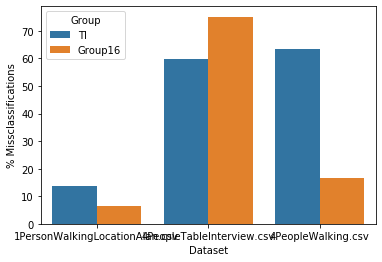

In [65]:
missclassifications = np.array([])
for name in tiVsAlgFiles:
    path = 'C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Algorithm vs TI\\' + name
    tiVsAlgDf = pd.read_csv(path, usecols=['TI', 'Group 16'], dtype=int)
    path = 'C:\\Users\\hasna\\Documents\\GitHub\\OccupancyDetection\\Results\\Ground Truth\\' + name
    groundTruthDf = pd.read_csv(path, usecols=['Expected Kalman'], dtype=int)
    
    #compare the ground truth to TI
    if missclassifications.size == 0:
        missclassifications = np.array([zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['TI'])*100, 'TI', name])
        missclassifications = np.vstack((missclassifications,
                                        np.array([zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['Group 16'])*100, 'Group16',name])))
    else:
        missclassifications = np.vstack((missclassifications,
                                        np.array([zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['TI'])*100, 'TI',name])))
        missclassifications = np.vstack((missclassifications,
                                        np.array([zero_one_loss(groundTruthDf['Expected Kalman'], tiVsAlgDf['Group 16'])*100, 'Group16',name])))
    
    
missclassificationsDf = pd.DataFrame(missclassifications)
missclassificationsDf.columns = ['% Missclassifications', 'Group', 'Dataset']
missclassificationsDf['% Missclassifications'] = missclassificationsDf['% Missclassifications'].astype(dtype=np.float32)
sns.barplot(x='Dataset', y='% Missclassifications', hue='Group', data=missclassificationsDf)

In [66]:
missclassificationsDf

,% Missclassifications,Group,Dataset
0,13.805522,TI,1PersonWalkingLocationAlan.csv
1,6.362545,Group16,1PersonWalkingLocationAlan.csv
2,59.880241,TI,4PeopleTableInterview.csv
3,75.149704,Group16,4PeopleTableInterview.csv
4,63.510391,TI,4PeopleWalking.csv
5,16.743649,Group16,4PeopleWalking.csv


In [56]:
missclassificationsDf

,% Missclassifications,Group,Dataset
0,13.805522,TI,1PersonWalkingLocationAlan.csv
1,6.362545,Group16,1PersonWalkingLocationAlan.csv
2,59.880241,TI,4PeopleTableInterview.csv
3,55.389221,Group16,4PeopleTableInterview.csv
4,63.510391,TI,4PeopleWalking.csv
5,52.886837,Group16,4PeopleWalking.csv
